# Electricity sources


In [6]:
import os,sys
here = os.path.abspath('')
sys.path.insert(0, os.path.normpath(os.path.join(here, '../../src')))
import hedera_types as hedera
import odk_interface as odk
import mtf
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt

# change plot layout
plt.rcParams["font.family"] = "Tw Cen MT"
plt.rcParams.update({'font.size': 20})

fondesurco = hedera.mfi(2)
odk_data_dir = '../../_datasets/DataODK/'
odk_survey_folder = ['PEPI_19_03_19/','PEPI_FONDESURCO_19_04_17/']
odk_data_name = [odk_data_dir + odk_survey_folder[0] + 'PEPI_results.csv',
                 odk_data_dir + odk_survey_folder[1] + 
                 'PEPI_FONDESURCO_2_results.csv']
fondesurco.gpsFile = '../../_datasets/Fondesurco/HederaGPS/All.txt'
fondesurco.data_client_file = '../../_datasets/Fondesurco/ClientDatabases/data_with_GPS_3.csv'
data = fondesurco.read_survey(odk_data_name)
fondesurco.HH = odk.households(data)
# get summaries of used sources, fuels, stoces
collection_overview = odk.overview(fondesurco.HH,[fondesurco])

sources_summary = odk.summary(collection_overview,
                                  hedera.keys().powerSources,
                              hedera.names('en').powerSources,
                              hedera.keys().powerSourcesColors)

## Sources per office
The vaste majority of the sample is connected to the grid

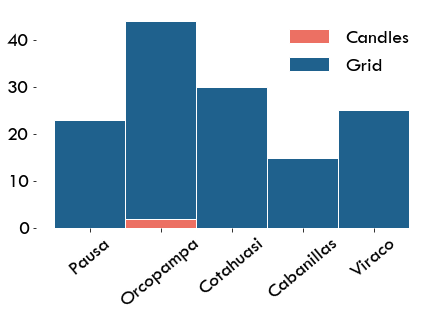

In [7]:

odk.plot_sources_summary(collection_overview,'en')


## Energy expenses

Households spend in average less than 30 Soles per month in electricity.



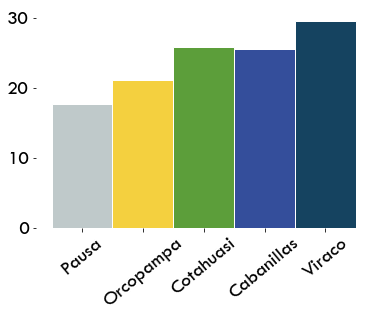

In [8]:
fondesurco.plot_mean_per_office(fondesurco.HH,'energy_expenses')

## Expenses vs. Source
Households using candles have higher energy costs.

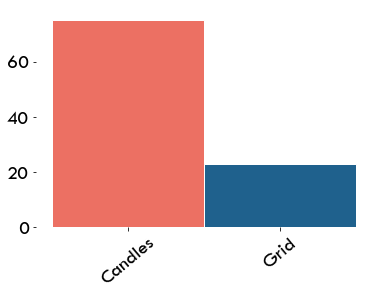

In [9]:
colors = []
for k in sources_summary.used_keys:
    ic = hedera.keys().powerSources.index(k)
    colors.append(hedera.keys().powerSourcesColors[ic])
fondesurco.plot_mean_per_category(fondesurco.HH,'energy_expenses',
                                  'primary_electricity_source',
                                  sources_summary.used_keys,
                                  sources_summary.used_names,
                                  colors, figName = None)